In [ ]:
!pip install rasterio

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import rasterio

In [ ]:
img1 = rasterio.open('landsat8.tif')
img1

In [5]:
img1.name

'landsat8.tif'

In [6]:
img1.count  # number of bounds

9

In [7]:
img1.width, img1.height

(332, 329)

In [8]:
img1.bounds

BoundingBox(left=261922.5, bottom=4664377.5, right=271882.5, top=4674247.5)

In [9]:
img1.transform

Affine(30.0, 0.0, 261922.5,
       0.0, -30.0, 4674247.5)

In [10]:
img1.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32630"]]')

In [11]:
img = img1.read() # read image as array

In [ ]:
img

In [13]:
type(img)

numpy.ndarray

In [14]:
img.shape # (bound, height, width)

(9, 329, 332)

In [15]:
B1 = img1.read(1) # read bound 1
B1.shape

(329, 332)

In [16]:
dsm = rasterio.open('DSM.tif').read()
type(dsm)

numpy.ndarray

(-0.5, 66.5, 66.5, -0.5)

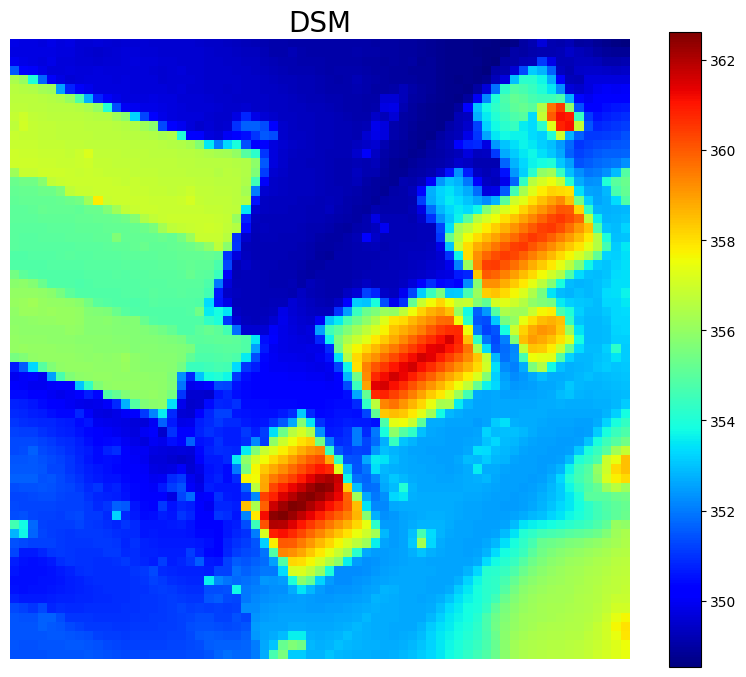

In [19]:
plt.figure(figsize=(10, 15))
plt.imshow(dsm.reshape(-1, 67), cmap='jet')
plt.title('DSM', fontsize=20)
plt.colorbar(shrink=0.55)
plt.axis('off')

In [20]:
img.shape

(9, 329, 332)

In [21]:
img1 = np.moveaxis(img, 0, 2)
img1.shape

(329, 332, 9)

In [22]:
B = img1[:, :, 1]
G = img1[:, :, 2]
R = img1[:, :, 3]
NIR = img1[:, :, 4]

rgb_image = np.dstack([R, G, B])
rgb_image.shape

(329, 332, 3)

In [23]:
type(rgb_image)

numpy.ndarray

In [24]:
rgb_image.dtype

dtype('uint16')

(-0.5, 331.5, 328.5, -0.5)

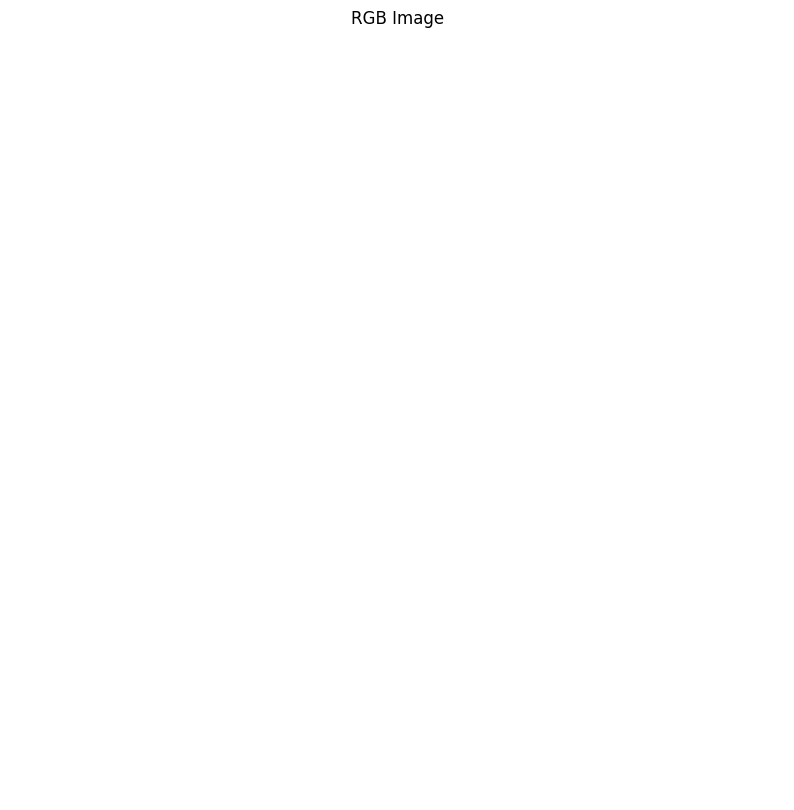

In [25]:
plt.figure(figsize=(10, 20))
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

In [ ]:
def normalizing(band):
  normalized = (band - np.amin(band)) / (np.amax(band) - np.amin(band))
  return normalized
normalized_rgb = normalizing(rgb_image)
normalized_rgb

(-0.5, 331.5, 328.5, -0.5)

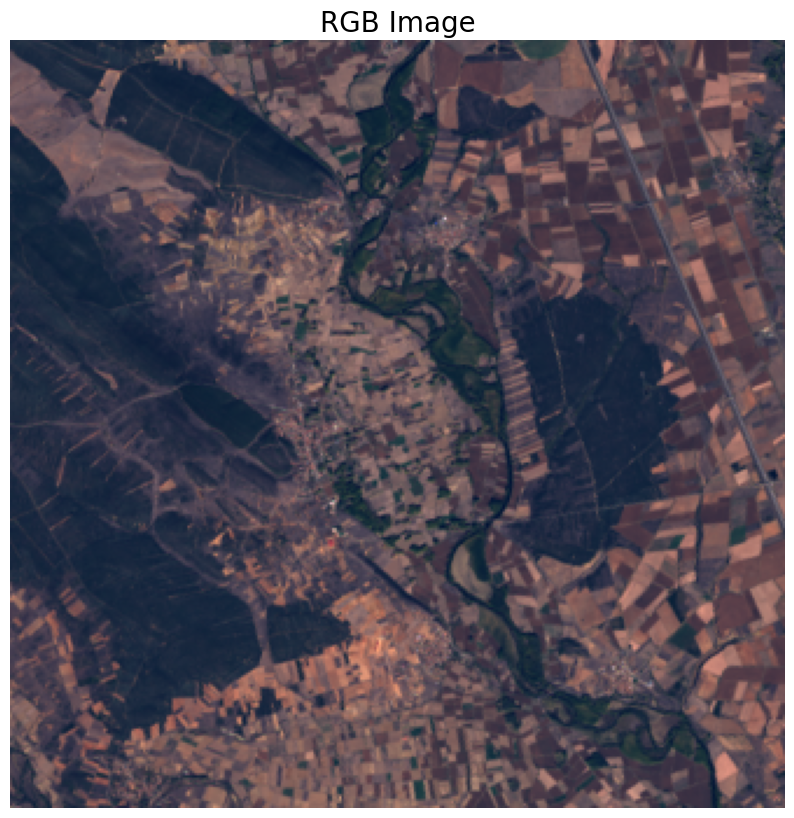

In [30]:
plt.figure(figsize=(10, 20))
plt.imshow(normalized_rgb)
plt.title('RGB Image', fontsize=20)
plt.axis('off')

(-0.5, 331.5, 328.5, -0.5)

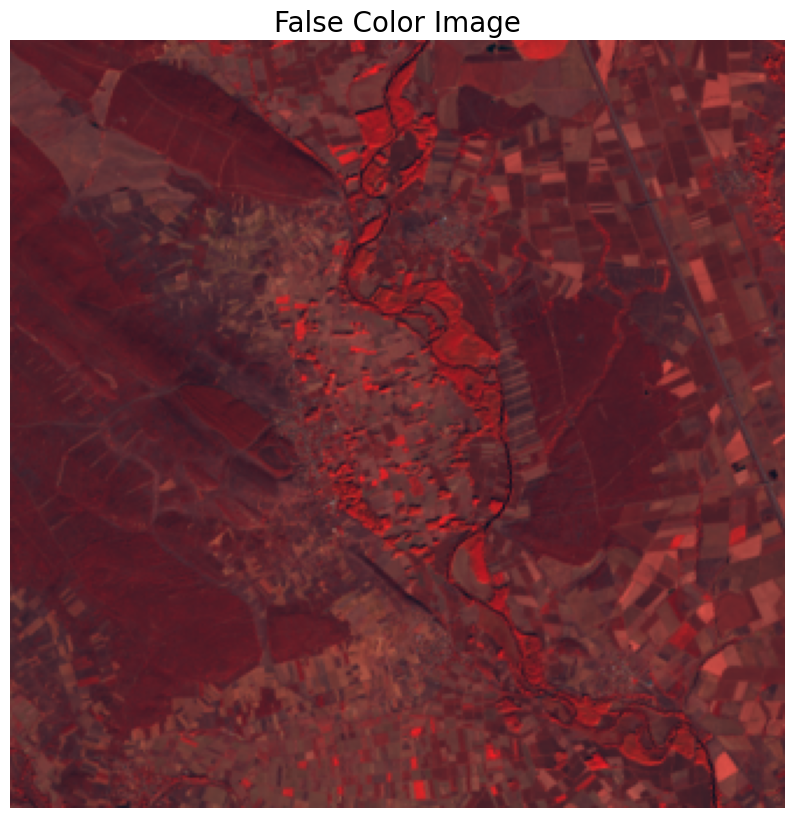

In [34]:
false_color_img = img1[:, :, [4, 2, 1]]
normalized_false_color = normalizing(false_color_img)

plt.figure(figsize=(10, 20))
plt.imshow(normalized_false_color)
plt.title('False Color Image', fontsize=20)
plt.axis('off')

In [35]:
img2 = rasterio.open('landsat8.tif')
img2.read(0)

IndexError: band index 0 out of range (not in (1, 2, 3, 4, 5, 6, 7, 8, 9))

In [36]:
img2.count

9

In [37]:
img2 = np.dstack([img2.read(i) for i in range(1, img2.count + 1)])
img2.shape

(329, 332, 9)

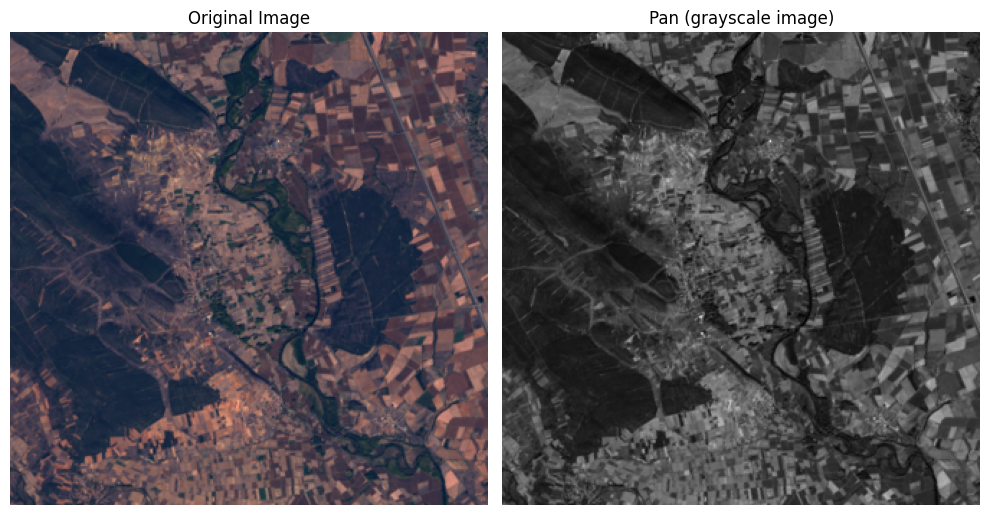

In [38]:
import cv2

pan = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 10), sharey=True, tight_layout=True)

axs[0].imshow(normalizing(img1[:, :, [3, 2, 1]]))
axs[1].imshow(pan, 'gray')
#
axs[0].title.set_text('Original Image')
axs[1].title.set_text('Pan (grayscale image)')
# plt.axis('off')
[axi.set_axis_off() for axi in axs.ravel()]
plt.show()

In [39]:
Green = img1[:, :, 2]
Red = img1[:, :, 3]

print('Min Red:', np.amin(Red))
print('Max Red:', np.amax(Red))
print('Mean Red:', np.mean(Red))
print('std Red:', np.std(Red))

Min Red: 5866
Max Red: 13326
Mean Red: 8037.4786410078
std Red: 1191.4340302131548


In [ ]:
img = rasterio.open('landsat8.tif')

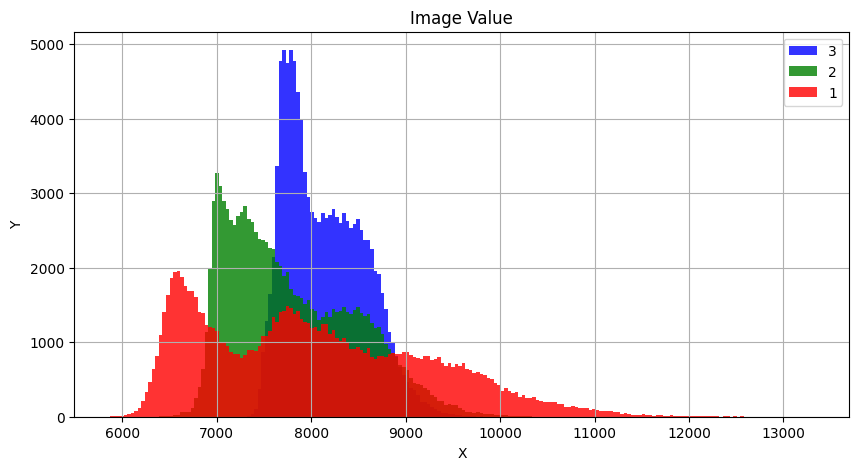

In [48]:
from rasterio.plot import show_hist

hist_data = img.read([4, 3, 2])
fig, axhist = plt.subplots(1, 1, figsize=(10, 5))

show_hist(hist_data, bins=200, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.8, ax=axhist)

axhist.set_xlabel('X')
axhist.set_ylabel('Y')
axhist.set_title('Image Value');

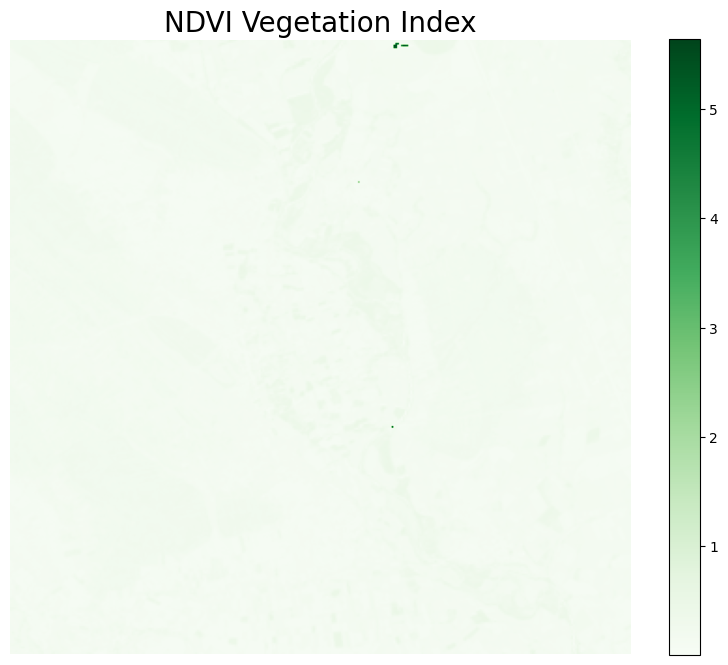

In [54]:
NDVI = (NIR - R) / (NIR + R)

plt.figure(figsize=(10, 10))
plt.imshow(NDVI, 'Greens')
plt.title('NDVI Vegetation Index', fontsize=20)
plt.colorbar(shrink=0.8)
plt.axis('off')
plt.show()

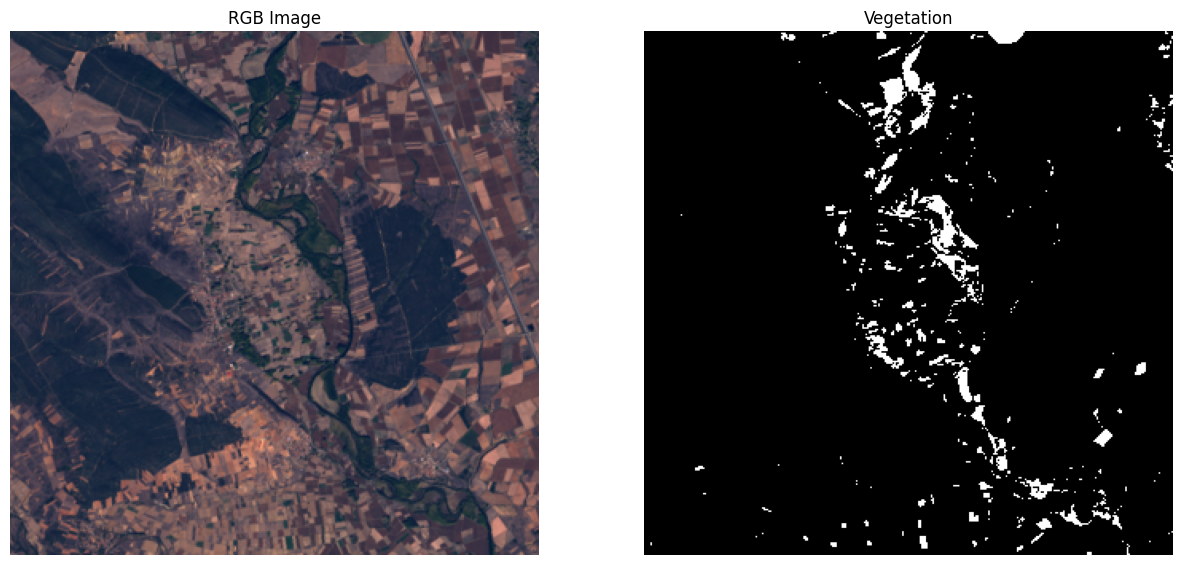

In [55]:
# Detect vegetation using threshing over NDVI index
Vegetation = np.zeros((R.shape[0], R.shape[1]))
Vegetation[NDVI > 0.3] = 1

fig, ax = plt.subplots(figsize=(15,15), ncols=2)

ax[0].imshow(normalizing(rgb_image))
ax[0].title.set_text('RGB Image')

ax[1].imshow(Vegetation,'gray')
ax[1].title.set_text('Vegetation')

[axi.set_axis_off() for axi in ax]
plt.show()

SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low. Landsat Surface Reflectance-derived SAVI is calculated as a ratio between the R and NIR values with a soil brightness correction factor (L) defined as 0.5 to accommodate most land cover types.

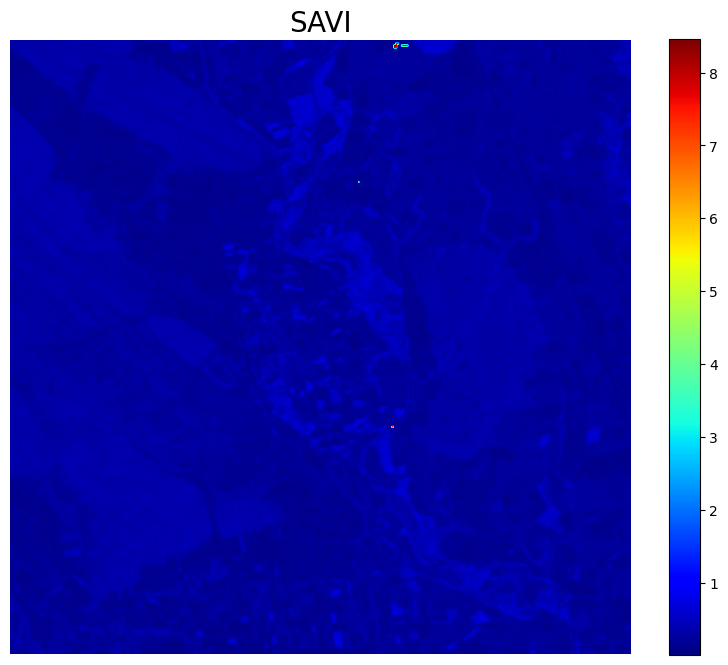

In [56]:
L = 0.5
SAVI = ((NIR - R) / (NIR + R + L)) * (1 + L)
plt.figure(figsize=(10, 10))
plt.imshow(SAVI, 'jet')
plt.title('SAVI', fontsize=20)
plt.colorbar(shrink=0.8)
plt.axis('off')
plt.show()